<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/Classification_CNNs-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# কনভল্যুশনাল নিউরাল নেটওয়ার্ক দিয়ে ইমেজ ক্লাসিফিকেশন 

### শুরুতেই বেসিক ধারণা 

আজকে আমরা আলাপ করছি ‘কনভল্যুশনাল নিউরাল নেটওয়ার্ক’ দিয়ে। একে আমরা সচরাচর ‘সিএনএন’ বলে থাকি। আমাদের এই নতুন ডিপ নিউরাল নেটওয়ার্কের কাজ আগের নেটওয়ার্ক থেকে অনেকটাই দক্ষ, বিশেষ করে ইমেজ প্রসেসিং এ। ব্যাপারটা বোঝার জন্য আমাদেরকে তাকাতে হবে মানুষের মস্তিষ্কের দিকে। আমরা সারাদিন কি করি? সজ্ঞানে অথবা ভুলোমনে হোক, আমরা সারাদিন ধরে নতুন জিনিসপত্র দেখি, সেটা কে চিনে মনে মনে লেবেল করি, এইটা হচ্ছে পাহাড়, এইটা বাঘ - শেষে সবকিছুর একটা প্যাটার্ন বুঝতে পারি। আবার, যেটা জানিনা বা বুঝিনা সেটাই ভূত। 

ব্যাপারটা কিন্তু এমনিতেই হয়নি। মানুষের প্রায় ৫০ কোটি বছর লেগেছে এই ধরনের জিনিস মাথায় তৈরি হতে। আমাদের চোখ এবং ব্রেনের মধ্যে যে কোঅর্ডিনেশন এবং কোলাবরেশন তার জন্যই কিন্তু আমরা দেখতে পারি পৃথিবীর আশেপাশে। একটা বাচ্চা যেভাবে তার আশেপাশের বিভিন্ন অবজেক্টকে দেখে চিনতে শিখে, সেভাবে আমাদের অ্যালগরিদমকে লক্ষ লক্ষ ছবি দেখাতে হবে যাতে তার একটা 'জেনারেলাইজড' আইডিয়া হয়, কোনটা কি হতে পারে। এরপর একটা ছবি যেটা আগে তাকে দেখানো হয়নি, সেটা দেখে বলতে পারবে ছবিটা কিসের। কম্পিউটার আর মানুষের মধ্যে দেখার পার্থক্য আছে। কম্পিউটার যা দেখে তার সবই সংখ্যা। প্রতিটা ছবি আসলে একটা দুই ডাইমেনশনের সংখ্যার অ্যারে, যেগুলোকে পিক্সেল বলছি আমরা। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/neuron.jpg"> চিত্রঃ মানুষ কিভাবে দেখে? আমাদের কনভল্যুশনাল নিউরাল নেটওয়ার্কের মতো 

আজকে যে ‘কনভল্যুশনাল নিউরাল নেটওয়ার্ক’ নিয়ে আলাপ করছি সেটা নিয়ে রিসার্চ হয়েছে ১৯৬০ সালের দিকে। বিশেষ করে মানুষ এবং অন্যান্য স্তন্যপায়ী প্রানীরা কিভাবে দেখে। আমাদের ভিজুয়াল কর্টেক্সে নিউরনগুলো কিভাবে কাজ করে তার থেকেই ধারণা নিয়ে তৈরি এই কনভলিউশনাল নেটওয়ার্ক। সাধারণ নিউরাল নেটওয়ার্ক থেকে এ কারণে এই নেটওয়ার্কের আর্কিটেকচার ভিন্ন। একে অনেকে ডিপ নিউরাল নেটওয়ার্ক বলতে নারাজ। সাধারণ নিউরাল নেটওয়ার্ক এবং কনভল্যুশনাল নিউরাল নেটওয়ার্কের প্রাথমিক পার্থক্য হচ্ছে এদের কাজের ধারা, এবং একটা কানেক্টেড, আরেকটা অতোটা কানেক্টেড না। কনভলিউশন শব্দটা এসেছে অংক থেকে যার মানে হচ্ছে দুটো ফাংশনের একটা ম্যাথমেটিক্যাল কম্বিনেশন যেটার আউটকাম তৃতীয় একটা ফাংশন। ইনপুট থেকে পাওয়া দুটো সেটকে এক জায়গায় নিয়ে আসাকে কনভলিউশন বলে।

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/cnn2.png"> চিত্রঃ কনভল্যুশনাল নিউরাল নেটওয়ার্কের একটা এন্ড টু এন্ড ডায়াগ্রাম 

### ফিচার এক্সট্রাকশন এবং ক্লাসিফিকেশন 

কনভল্যুশনাল নিউরাল নেটওয়ার্কের দুটো ভাগ

১. ফিচার এক্সট্রাকশন/হিডেন লেয়ার পার্ট: এখানে কনভল্যূশন এবং পুলিং (পরে বলছি) এর মাধ্যমে ফিচার এক্সট্রাকশন মানে মানুষের মুখ হলে তার নাক চোখ, মুখ এগুলোকে ডিটেক্ট করে আগে লেয়ার বাই  লেয়ার। এর কাজ শেষ হলে পরেরটা শুরু হয়। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cnn7.jpeg"> চিত্রঃ কনভল্যুশনাল নিউরাল নেটওয়ার্কের শুরুর অংশ 

২. এটা ফুলি কানেক্টেড লেয়ার, যা কাজ করে ফিচার এক্সট্রাক্ট করার হয়ে গেলে - ক্লাসিফাইয়ার তার প্রোবাবিলিটি ডিস্ট্রিবিউশন থেকে যার ভোটিং বেশি হয় সেই ছবিকে বলে দেয়। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/neural_net2.jpeg"> চিত্রঃ সাধারণ নিউরাল নেটওয়ার্কের শেষের অংশ 

সাধারণ নিউরাল নেটওয়ার্কের ইনপুট এ যা দেয়া হয় সেটাকে সে ট্রান্সফরম করতে থাকে তারপরের হিডেন লেয়ারের সিরিজ থেকে। প্রতিটা লেয়ারে অনেকগুলো নিউরন থাকে, আবার প্রতিটা লেয়ার একটা আরেকটার সাথে 'ফুলি কানেক্টেড'। সেখানে কনভল্যুশনাল নিউরাল নেটওয়ার্কগুলো একটু ভিন্ন। তাদের লেয়ারগুলোকে আমরা অরগানাইজ করি তিন ডাইমেনশনে মানে দৈর্ঘ্য প্রস্থ এবং উচ্চতায় (ছবি হলে তিন রঙয়ের চ্যানেল)। ভয় পাবেন না, সামনে আমরা সেগুলো ছবি দিয়ে বুঝিয়ে দেব। এখানে সব নিউরনগুলো একটা আরেকটার সাথে কানেক্টেড না, তবে ছোট ছোট রিজিয়ন দিয়ে কানেক্টেড। এটাই সিএনএনের বড় প্লাস পয়েন্ট। 

সাধারণ নিউরাল নেটওয়ার্ক এ আমরা পুরো ছবিকেই প্রসেস করতাম। এখানে একটা ছবি অনেকগুলো ফিল্টারের মধ্যে দিয়ে যাবে। শুরুতে আমাদের এখানে ইনপুট ডাটা ছোট একটা ফিল্টার এর মধ্যে যাবে, এখানে ফিল্টার অথবা কার্নাল এই দুটো আসল ইনপুট ইমেজ থেকে ছোট তাই এর দক্ষতা অনেক ভালো। এই ফিল্টারগুলোর আউটপুট জমা হয় ফিচার ম্যাপে। বড় একটা ছবিকে তার ছোট পিক্সেল সাইজ ফিল্টার দিয়ে যেই ম্যাথমেটিক্যাল অপারেশন করবো তার আউটপুট এসে জমা হবে ফিচার ম্যাপে। এই ফিল্টারগুলো স্লাইডিং করবে পুরো ইমেজ জুড়ে। ইমেজ এবং ফিল্টারের মাট্রিক্স মালটিপ্লিকেশন হবার পর সেটার যোগফল এসে জমা হয় ফিচার ম্যাপে। আবারো বলছি কনভলিউশন হচ্ছে অরিজিনাল ছবির ডাটা সাথে ফিল্টারের মাট্রিক্স মালটিপ্লিকেশন এবং তার রেজাল্ট এসে ধুঁকছে ফিচার ম্যাপে। এর পাশাপাশি এই আউটপুটকে আমরা বলছি ডাউন স্যাম্পলিং, যেটাকে সবাই বলছে 'ম্যাক্স পুলিং' যার কাজ হচ্ছে আমরা যখন একটা রিজিওন সিলেক্ট করি তখন সেখান থেকে সর্বোচ্চ ভ্যালুটাকে আমরা সেই রিজিওনের জন্য নতুন ভ্যালু হিসেবে ডিক্লেয়ার করি। আসুন ছবি দেখে হিসেব মিলাই। এখানে একটা ছবি থেকে বিড়ালকে আমরা ক্লাসিফাই করব। এই মজার ছবি আর কনটেন্ট এর জন্য হ্যারিসনকে ধন্যবাদ। উনার সাইট হচ্ছে pythonprogramming.net ।

## ছবিতে বিড়ালের ফিচার এক্সট্রাকশন এবং ক্লাসিফিকেশন

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cat1.png"> চিত্রঃ একটা বেড়াল, বেড়াল মনে হচ্ছে না? 

১. এক নাম্বার ছবিতে আমরা ধরে নিচ্ছি একটা বিড়াল আছে। বিড়ালটার আঁকাটা যতই খারাপ হোক না কেন আমার মনে হয় বোঝা যাচ্ছে এটা যে একটা বিড়াল। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cat2.png"> চিত্রঃ ৫ X ৪ পিক্সেল ছবি 

২. মেশিনের বোঝার সুবিধার জন্য এই চারকোনা ঘরগুলো মানে একেকটা পিক্সেল দিয়ে ভাগ করে ফেলেছি। একটা ছবিতে মিলিয়ন পিক্সেল থাকতে পারে তবে আমরা বোঝার সুবিধার জন্য এখানে কমিয়ে দিয়েছি ৫ X ৪ পিক্সেলে।

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cat3.png"> চিত্র:৫ X ৪ পিক্সেলের ছবি 

৩. কনভল্যুশন এর সময় আমরা এই বিড়ালের ছবিটার পুরো অংশ না নিয়ে একটা অংশ নেব। এখানে আপনারা দেখছেন একটা ৩ X ৩ একটা উইন্ডো নিয়েছি এই ফিল্টার বানানোর জন্য। আমরা এই ৩ X ৩ পিক্সেলের রিজিওন এর মধ্যেই আমাদের ফিচার খুজবো। এই ৩ X ৩ পিক্সেলের আউটপুট আমরা নিয়ে আসব ১ (এক) পিক্সেলের ফিচার ম্যাপে। এখানে আমরা একটা পিক্সেলের ফিচার ম্যাপ দেখাচ্ছি, আসল সময় এখানে অনেকগুলো ফিচার ম্যাপ আসবে।

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cat4.png"> চিত্রঃ একটা পিক্সেলের ফিচার ম্যাপ

৪. এখন আমাদের ৩ X ৩ যে কার্নাল বা ফিল্টার ব্যবহার করেছি, সেটাকে ডানে ১ পিক্সেল করে স্লাইড করব। এরপর আরো ১ পিক্সেল করে স্লাইড করবো। এর অর্থ ২ পিক্সেলের স্ট্রাইড। মনে রাখতে হবে যাতে আমরা কোন পিক্সেল এই ফিল্টার থেকে হাতছাড়া না হয়ে পড়ে। এইজন্য অনেক পিক্সেল ওভারল্যাপ হবে, কিন্তু এতে কোন পিক্সেল বাদ পড়বে না। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cat5.png"> চিত্রঃ ২ পিক্সেলের স্ট্রাইড

৫. এইভাবে আমরা ডানে বামে উপরে নিচে সবজায়গায় স্লাইডিং করব, যাতে পুরো ইমেজটাকে কাভার করতে পারি। আমাদের এই ৩ X ৩ ফিল্টার দিয়ে যে ফিচার ম্যাপ তৈরি করছি সেটা ৩ X ৩ ফিল্টার থেকে একটা একটা করে ইনপুট নিয়ে ফিচার ম্যাপ তৈরি করেছে। অনেকগুলো পিকচার থেকে আমরা এখন কমিয়ে নিয়ে এলাম মাত্র চারটা পিক্সেল ভ্যালুর ফিচার ম্যাপ।

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cat6.png"> চিত্রঃ চারটা পিক্সেল ভ্যালুর ফিচার ম্যাপ

৬. এখন আমরা পুলিং এর কাজ করব। আমরা ধরে নিচ্ছি আমাদের কনভলিউশন ছবির বদলে এই সংখ্যাগুলো দিয়েছে। এই সংখ্যাগুলো এসেছে পিক্সএল ভ্যালু এবং ফিল্টার ভ্যালু এর মাট্রিক্স মালটিপ্লিকেশন থেকে।

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cat7.png"> চিত্রঃ পুলিং এর কাজ

৭. এখানে আমরা আবার একটা ৩ X ৩ পুলিং উইন্ডো নিচ্ছি। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cat8.png"> চিত্রঃ ৩ X ৩ পুলিং উইন্ডো

৮. এই পুলিং এর সবচেয়ে বেশি ব্যবহৃত ফর্ম হচ্ছে 'ম্যাক্স পুলিং', যার কাজ হচ্ছে ওই উইন্ডোর মধ্যে থেকে সবচেয়ে বেশি ভ্যালুকে বের করে আনা। ওই উইন্ডো বা রিজিওনের জন্য সেটাই নতুন ভ্যালু। আপনি দেখুন প্রথম উইন্ডোতে ৩ X ৩ পুলিং ৪ হচ্ছে সর্বোচ্চ সংখ্যা। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cat9.png"> চিত্রঃ সবগুলো পিক্সেল থেকে নতুন চারটা ভ্যালু

৯. দুই পিক্সেল ডানে নতুন যে উইন্ডো হল তার সর্বোচ্চ ভ্যালু হচ্ছে ৩। উপর থেকে নিচের দিকে ১ পিক্সেল স্লাইড করলে যে ৩ X ৩ উইন্ডো পাওয়া যায় তার সর্বোচ্চ ভ্যালু হচ্ছে ৪। হিসেবে নিচের উইন্ডোকে আরো দুই পিক্সেল ডানে নিলে যে ম্যাক্স পুলিং উইন্ডো হবে সেটার সর্বোচ্চ ভ্যালু হচ্ছে ৩। আমরা সবদিকে স্লাইডিং করে পুরনো ছবি তে সবগুলো পিক্সেল কাভার করলে আমরা নতুন চারটা ভ্যালু পাব যা রিপ্রেজেন্ট করবে বিড়ালের পুরো ছবিটাকে।

বেশি ঝামেলার মনে হচ্ছে? আচ্ছা, আপাততঃ কনভল্যুশনাল নিউরাল নেটওয়ার্ক দিয়ে ইমেজ ক্লাসিফিকেশন না করে কিভাবে সেই ডেটাসেট সহজে ব্যবহার করা যায় সেটার একটা পন্থা বের করছি। এরপর ফিরে যাবো কনভল্যুশনাল নিউরাল নেটওয়ার্ক দিয়ে কাজে। 

## ইনস্টল এবং ইমপোর্ট করে নেই দরকারি লাইব্রেরি 

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
  # শুধুমাত্র টেন্সর-ফ্লো ২.x ব্যবহার করবো 
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


## টেন্সর-ফ্লো ডেটাসেট এপিআই ব্যবহার

মনে আছে সাইকিট লার্নের কথা? এর ভেতরের ডেটাসেট নিয়ে কাজ করেছিলাম আমরা। আলাদা করে ডাউনলোড করতে হয়নি। আমরা সেভাবেই টেন্সর-ফ্লো ডেটাসেট এপিআই [TensorFlow Datasets](https://www.tensorflow.org/datasets/), ব্যবহার করবো যাতে এই বিশ্বখ্যাত সব ডেটাসেটে আমরা এক্সেস পাই সহজে, ঝামেলাপূর্ণ ডাউনলোড ছাড়াই - শুধু জানতে হবে সেটার কনভেনশন। 

### আমাদের সব ডেটাসেট এক্সপোজ করা আছে tf.data.Datasets এ 
কিছু টেস্ট চালাই এখানে 

In [0]:
# টেন্সর-ফ্লো ডেটাসেট tfds
import tensorflow_datasets as tfds

In [4]:
# আপনি দেখুন কতো কতো রিসার্চ ডেটাসেট এখানে 
# প্রতিটা ডেটাসেট ইমপ্লিমেন্ট করা আছে  tfds.core.DatasetBuilder হিসেবে 
# তার আগে লিস্ট দেখি 
print(tfds.list_builders())

['abstract_reasoning', 'aflw2k3d', 'amazon_us_reviews', 'bair_robot_pushing_small', 'bigearthnet', 'binarized_mnist', 'binary_alpha_digits', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_corrupted', 'clevr', 'cnn_dailymail', 'coco', 'coco2014', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'downsampled_imagenet', 'dsprites', 'dtd', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eurosat', 'fashion_mnist', 'flores', 'food101', 'gap', 'glue', 'groove', 'higgs', 'horses_or_humans', 'image_label_folder', 'imagenet2012', 'imagenet2012_corrupted', 'imdb_reviews', 'iris', 'kitti', 'kmnist', 'lfw', 'lm1b', 'lsun', 'mnist', 'mnist_corrupted', 'moving_mnist', 'multi_nli', 'nsynth', 'omniglot', 'open_images_v4', 'oxford_flowers102', 'oxford_iiit_pet', 

## আমরা একটু দেখি tfds.load এবং DatasetBuilder এর কাজ 

### `tfds.load`: যাকে আমরা বলছি এক লাইনে এক ডেটাসেট 

`tfds.load` দিয়ে খুব সহজে একটা ডেটাসেট বিল্ড এবং লোড করা যায়। `tf.data.Dataset` হচ্ছে স্ট্যান্ডার্ড টেন্সর-ফ্লো এপিআই বিশেষ করে ইনপুট পাইপলাইন তৈরি করতে। আমরা ডাউনলোড করে নিতে পারি `data_dir=`তে বলে। আর তা না হলে ডিফল্ট হচ্ছে `~/tensorflow_datasets/`).

In [5]:
# এই mnist কিন্তু হাতে লেখা সংখ্যাকে চেনার ডেটাসেট, ফ্যাশন নয় 
# একঘেঁয়েমি কাটানোর জন্য নতুন জিনিস 
mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


### কোন ভার্সনের ডেটাসেট দরকার?

In [6]:
mnist = tfds.load("mnist:1.*.*")

### ফিচার ডিকশনারি 

আমাদের সাইকিট লার্নের মতো এখানে টেন্সর-ফ্লো ডেটাসেট tfds এর ফিচার ডিকশনারির সব ফিচারকে ম্যাপ করা হয়েছে টেন্সর ভ্যালুতে। যেমন, আমাদের ডেটাসেট MNIST, এর দুটো কী আছে: "image" এবং "label"। আমরা একটা রেকর্ড মানে ফুল এক্সাম্প্ল দেখি। 

Label: 8


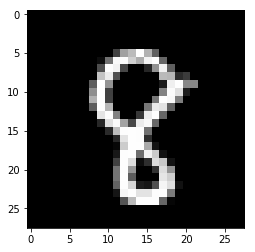

In [7]:
for mnist_example in mnist_train.take(1):  # একটা উদাহরণ নেই (একটা জোড়া)
  image, label = mnist_example["image"], mnist_example["label"]

  plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
  print("Label: %d" % label.numpy())

## DatasetBuilder এর কাজ 

DatasetBuilder আসলে tfds.load কে সাহায্য করে অন্যভাবে, একই ধরণের কাজ কিছুটা। আমরা আগের কাজটা করে দেখি MNIST DatasetBuilder দিয়ে। 

In [0]:
mnist_builder = tfds.builder("mnist")

### ইনফো এট্রিবিউট দেখি, সব তথ্য আছে এখানে 

In [9]:
print(mnist_builder.info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



### ডেটাসেট.ইনফো এর মধ্যে ফিচার নিয়ে অনেক তথ্য আছে 

In [10]:
test = mnist_builder.info
print(test.features)
print(test.features["label"].num_classes)
print(test.features["label"].names)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})
10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [0]:
# যদি আমরা ডাউনলোড এবং সেটাকে তৈরি করতে চাই 
# mnist_builder.download_and_prepare()

In [0]:
# পরীক্ষা করে দেখুন 
# mnist_train = mnist_builder.as_dataset(split="train")
# mnist_train

### সরাসরি লোড করে দেখি 
DatasetInfo লোড করি tfds.load দিয়ে with_info=True সহ। 

In [0]:
# mnist_train, info = tfds.load("mnist", split="train", with_info=True)
mnist_test, info = tfds.load("mnist", split="test", with_info=True)

# imdb, info = tfds.load("mnist", with_info=True, as_supervised=True)
# train_data, test_data = imdb['train'], imdb['test']

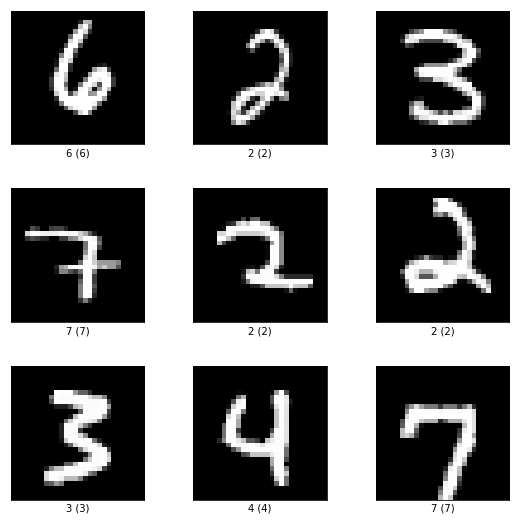

In [14]:
fig = tfds.show_examples(info, mnist_test)

অনেক গল্প হলো, ফিরে আসি কনভল্যুশনাল নিউরাল নেটওয়ার্ক দিয়ে ইমেজ ক্লাসিফিকেশন নিয়ে। কোনটা করবো MNIST না ফ্যাশন MNIST? আমরা নতুন যুগের ফ্যাশনেবল মানুষ। 

##  টেন্সর-ফ্লো ডেটাসেট এপিআই ব্যবহার করে নিয়ে আসি Fashion MNIST

মনে রাখি একটা কথা। আমরা এই এক্সারসাইজ করেছি সাধারণ নিউরাল নেটওয়ার্ক দিয়ে। আর সেকারণে এটার কনভল্যুশনাল নিউরাল নেটওয়ার্ক নিয়ে আলাপ করবো এখানে। আগের এক্সারসাইজের কোড চলবে এখানে। তাই, ডুপ্লিকেশন করছি না। 

In [0]:
# আর বলতে হবে? টেন্সর-ফ্লো ডেটাসেট এপিআই
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

### আমাদের দরকার train_dataset এবং test_dataset, ব্যবহার করছি tfds.load

In [16]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


### আমরা একটু মেটাডেটা দেখি, কি বলছে ডেটাসেট সম্পর্কে?

In [17]:
print(metadata)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=1.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    urls=['https://github.com/zalandoresearch/fashion-mnist'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume  

আমাদের এপিআই ফেরৎ দিচ্ছে train_dataset` এবং test_dataset`, আর আগের মেটাডেটা। 

* মডেলকে ট্রেনিং করবো `train_dataset` দিয়ে। 
* মডেলকে টেস্ট করবো `test_dataset` দিয়ে। 

আগেও বলেছি - আমাদের ছবিগুলো ২৮x২৮ পিক্সেলের নামপাই অ্যারে যার গ্রেস্কেলের কালার ইনটেনসিটি ভ্যালু ০ থেকে ২৫৫ এর মধ্যে। এখানে লেবেলগুলো, মানে যাদেরকে আমরা প্রেডিক্ট করবো তাদের ইন্টেজারের অ্যারে, ০ থেকে ৯ পর্যন্ত।

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### আমাদের ডেটাগুলোকে এক্সপ্লোর করি

এর আগেও আমরা ডাটাগুলোকে এক্সপ্লোর করেছি, তবে এবার আমরা জানতে চাচ্ছি একটু ভিন্নভাবে। একই জিনিস যে কয়েকভাবে করা যায় সেটার একটা উদাহরণ টানছি এখানে। আগের মতো আমরা ৬০,০০০ ছবি ট্রেনিংসেটে এবং ১০,০০০ ছবি টেস্টসেটে আছে সেটাই দেখানোর চেষ্টা করছি।

In [19]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## আমাদের ডাটাকে নর্মালাইজ করছি

যেহেতু ছবির ডাটা, সে কারণে ছবির গ্রেস্কেলে ইনটেনসিটি ০ থেকে ২৫৫ ভ্যালুকে আমরা ০ থেকে ১ এর মধ্যে নিয়ে আসব যাতে মেশিন লার্নিং মডেল ঠিকমতো কাজ করতে পারে। এই নর্মালাইজ ফাংশনকে আমরা টেস্ট এবং ট্রেনিং দুটো ডাটা সেটেই ব্যবহার করব।

In [0]:
# এখানে ম্যাপ ফাংশনকে ব্যবহার করছি দুটো ডেটাসেটে
# শুরুতেই একটা ফাংশন ডিফাইন করি 
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

## তৈরি করছি কনভল্যুশনাল নিউরাল নেটওয়ার্ক 

শুরুতেই নেটওয়ার্ক আর লেয়ারের কনফিগারশন, তারপর মডেল কম্পাইলেশন। 

### লেয়ারের সেটআপ

যেহেতু একেকটার লেয়ার আরেকটা লেয়ারের সাথে সিকুয়েন্সিয়াল, সে কারণেই শুরুতেই tf.keras.Sequential ব্যবহার করছি। বাকিটা আগের মতো। নিচের কোডকে যদি আমরা ছবি দিয়ে আঁকি, তাহলে এমন হতে পারে। <img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cnn3.1.png"> চিত্রঃ মডেল বেসড সিএনএন আর্কিটেকচার 

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

এখন নেটওয়ার্ক লেয়ারের গল্প:

২টা  লেয়ার।

* **"কনভল্যুশন"** `tf.keras.layers.Conv2D এবং MaxPooling2D`— আমাদের নেটওয়ার্ক শুরু হয়েছে দুই জোড়া কনভল্যুশন/ম্যাক্সপুল এলিমেন্ট দিয়ে। প্রথম লেয়ার হচ্ছে একটা Conv2D (৩, ৩) ফিল্টার, কার্নাল বলতে পারেন। এই কার্নাল বসানো হচ্ছে ইনপুট ইমেজের ওপর। আসল যেই ছবিটা আছে সেটার রেজল্যুশনকে দরকারি প্যাডিং দিয়ে ৩২টা আউটপুট ইমেজ যা কনভল্যুশন হয়ে গেছে ইতিমধ্যে। আমাদেরকে বুঝতে হবে এই লেয়ারটা ৩২টা কনভলিউশন ইমেজ তৈরি করে যা ৩২টা ইনপুট ইমেজের সমান। এই কনভলিউশন (কনভলিউটেড) ইমেজ যা আসলে এসেছে কার্নাল/ফিল্টারের আউটপুট থেকে। আবারো বলছি - ইনপুট থেকে একটা ইমেজের আউটপুট হিসেবে ৩২টা কনভলিউশন ইমেজ তৈরি হয়েছে ইনপুটের সাইজে। এখন এই ৩২টা আউটপুট ইমেজকে ছোট করার পালা। সে জিনিসটা আমরা করছি ম্যাক্সপুলিং২ডি, MaxPooling2D (২,২ পিক্সেল গ্রিড), যার স্ট্রাইড সংখ্যা হচ্ছে ২। মানে দুটো পিক্সেল করে স্লাইড করছে ডানে অথবা বামে। 


* এরপরের লেয়ারটা হচ্ছে Conv2D (৩, ৩) ফিল্টার। বুঝতেই পারছেন এই ফিল্টারটা হচ্ছে (৩, ৩) কার্নাল, যা আগের ৩২টা ইমেজকে নিচ্ছে ইনপুট হিসেবে। এই ৩২টা ইমেজকে ইনপুট হিসেবে নিয়ে আউটপুট হিসেবে বের করে দিয়েছে ৬৪টা ইমেজ। এখন এই ৬৪টা ইমেজকে আমরা আবার ছোট করে নিয়ে আসবো ম্যাক্সপুলিং২ডি, MaxPooling2D (২,২ পিক্সেল গ্রিড) লেয়ার দিয়ে। এই ম্যাক্সপুলিং২ডি লেয়ারের গ্রিড হচ্ছে ২,২। এটার স্ট্রাইড হচ্ছে ২ তার মানে ২ পিক্সেল করে স্লাইডিং করছে। 


* এখানে একটা জিনিস বুঝতে পারছি এই কনভলিউশন এবং ম্যাক্সপুলিং এই দুটো জিনিস বারবার চেইন হিসেবে কাজ করছে। একটার আউটপুট আরেকটা ইনপুট - এভাবে একটা চেইন ইফেক্ট তৈরি করছে যতক্ষণ না আমাদের কাজ হচ্ছে। কয়বার ব্যবহার করবো? সেটা নির্ভর করছে আমাদের ট্রায়ালের ওপর। এই চেইন আরো ভালো কাজ করবে যখন আমরা গ্রেস্কেল ইমেজ থেকে রঙ্গিন ছবিতে চলে যাব। 


* **ক্লাসিফায়ার আউটপুট** `tf.keras.layers.Dense` — এই সাধারন নিউরাল নেটওয়ার্কের শুরুতেই আমরা ‘ফ্ল্যাটেনিং’ করে নিচ্ছি ইনপুটে। একদম আগের গল্প। ছবি যাই হোক না কেন সেটাকে এক লাইনে দাড়া করাচ্ছি আমাদের ইনপুটের জন্য। এরপর আমরা এখানে ১২৮টা নিউরন দিয়ে একটা ‘ডেন্স’ (পাশাপাশি কানেক্টেড) লেয়ার তৈরি করেছি। এটার অ্যাক্টিভেশন ফাংশন হচ্ছে ‘রেল্যু’, এটাই ভালো এই কাজে। 


* আর শেষ লেয়ারটা কি হবে? ঠিক ধরেছেন, আমাদের যেহেতু দশটা অবজেক্ট মানে কাপড়চোপড়, জুতা, স্নিকার ইত্যাদি ইত্যাদি জিনিসকে ঠিকমতো ক্লাসিফাই করতে হবে - সেজন্য দরকার ১০টা নোডের একটা লেয়ার। প্রতিটা নোড ‘রিপ্রেজেন্ট’ করছে একটা করে কাপড়চোপড়ের ক্লাস। আমাদের এই সর্বশেষ লেয়ার ইনপুট নিচ্ছে ১২৮টা নোড থেকে, আর সেটার আউটপুট পাঠাচ্ছে ০ আর ১ এর মধ্যে। ০ এবং ১ সংখ্যার মধ্যে প্রোবাবিলিটি ডিস্ট্রিবিউশন যেটার সবচেয়ে বেশি হবে সেদিকেই সেই ক্লাসটাকে আইডেন্টিফাই করবে। আগেও বলেছি এই দশটা নোডের যোগফল হচ্ছে ১। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/cnn2.jpg"> চিত্রঃ ছবিটা কিছুটা এরকম হতে পারে

### মডেল কম্পাইলেশন 

আলাপ করেছি আগের নিউরাল নেটওয়ার্কে। 

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## মডেলকে ট্রেইন করি 

এতো ডেটা, এবার আমরা একটু অন্যভাবে মডেল ট্রেইন করি। এই ব্যাপারটা আগের মডেলেও চলবে। ট্রেইন ডেটাসেটের কিছু নতুন ধারণা - ব্যাচ নিয়ে। ব্যাচে ট্রেনিং। 

১. BATCH_SIZE = 32 অথবা `dataset.batch(32)` মানে হচ্ছে কতগুলো ইমেজ সে প্রসেস করবে ১ ব্যাচে `model.fit` ব্যবহার করার সময়। এই ফাঁকে মডেলের ভ্যারিয়েবলগুলো আপডেট হবে। 

২. `dataset.repeat()` মানে এই প্রসেস বারবার হবে শেষ না হওয়া পর্যন্ত। `epochs` বলছে পুরো ডেটাসেট কতোবার পুরোটাই 'আইটারেট' করবে। 

৩. shuffle(num_train_examples) মানে `dataset.shuffle(60000)` পুরো ডেটাসেটকে দৈবচয়নের ভিত্তিতে এমনভাবে ঘুটিয়ে দেবে যাতে সে আর শিখতে না পারে।  

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

আমরা `model.fit` মেথড কল করলে এই কাজগুলো হবে:

১. মডেলে ফিড হচ্ছে ট্রেনিং ডেটা, `train_dataset`।
2. মডেল শিখছে তার ইমেজ আর সেটার লেবেল থেকে। `train_dataset` এর মধ্যে ইমেজ এবং লেবেল দুটোই আছে। 
৩. ৫ * ৬০,০০০ = ৩০,০০০০ এক্সাম্পল এর সাথে দরকারি স্টেপ।  

In [24]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.3998 - accuracy: 0.8587
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2624 - accuracy: 0.9045
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2165 - accuracy: 0.9220
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1843 - accuracy: 0.9317
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1565 - accuracy: 0.9421
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1348 - accuracy: 0.9495
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1121 - accuracy: 0.9584
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0924 - accuracy: 0.9657
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0805 - accuracy: 0.9696
Epoch 10/10
1875/1875 [====================

মডেল ট্রেনিং এর সময় সেটার লস এবং অ্যাক্যুরেসি ম্যাট্রিক্স দেখলে বোঝা যায় ট্রেনিং ডেটার ওপর মডেল ভালো করেছে। এটাই স্বাভাবিক। 

## এখন আমরা অ্যাক্যুরেসি বের করবো কিভাবে?

অবশ্যই টেস্ট ডেটাসেট দিয়ে দিয়ে। তার সবগুলো এক্সাম্পল দিয়ে। 

In [25]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.3336 - accuracy: 0.9175
Accuracy on test dataset: 0.9175


সাধারণতঃ `train_dataset` থেকে `test_dataset` এর অ্যাক্যুরেসি কিছুটা কম হয়। এটাই স্বাভাবিক। কারণে সেতো ট্রেনিং করেছে `train_dataset` এর ওপর। এদিকে `test_dataset` তার কাছে অজানা ডেটা। এটাকে ওভারফিটিং বলে। 

## মডেল থেকে কিছু প্রেডিকশন করি 

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [27]:
predictions.shape

(32, 10)

টেস্টসেট থেকে মডেল কিছু প্রেডিকশন করেছে। শুরুর ইমেজটা দেখি। 

In [28]:
predictions[0]

array([8.0618525e-09, 9.0714196e-15, 8.8524193e-06, 6.9981121e-10,
       6.8139896e-02, 1.1065558e-12, 9.3185115e-01, 4.6377526e-16,
       2.9567674e-14, 5.5041184e-12], dtype=float32)

আমরা জানি যে আমাদের প্রেডিকশন অ্যারে কিন্তু ১০টা সংখ্যায় আসবে। কারণ আমাদের আউটপুট অবজেক্ট হচ্ছে ১০টা। তবে ১০টার আউটপুট তার 'করেসপন্ডিং' কনফিডেন্স লেভেল, কাপড়চোপড়, স্নিকার, জুতা ইত্যাদির জন্য। আমাদেরকে বের করতে হবে সবচেয়ে বেশি কনফিডেন্ট কোথায়? সবচেয়ে বড় ভ্যালুতে।  

In [29]:
np.argmax(predictions[0])

6

আমরা বুঝতে পারছি, মডেল কনফিডেন্ট একটা শার্টের ব্যাপারে মানে `class_names[6]`। তাহলে আমাদের টেস্ট লেবেলটা দেখি ছবিতে। 

In [30]:
test_labels[0]

6

## মডেল সামারি দেখি  

In [31]:
# pd.DataFrame(model.history).plot(ylim=(-0.05, 1.05))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## আমরা মডেলকে হার্ডড্রাইভে "সেভ" করি

মডেলকে 'সেভ' করার সুবিধা হচ্ছে সেটাকে আমরা পরে ব্যবহার করতে পারি। আবার লোড করতে পারি নতুন করে ট্রেনিং করানো ছাড়াই। মডেল 'সেভ' হবে কেরাসের HDF5 ফাইল ফরম্যাটে। এর এক্সটেনশন হচ্ছে '.h5', পাশাপাশি মডেল যাতে ভুলে ওভাররাইট না হয়ে যায় এজন্য় টাইমস্ট্যাম্প দিয়ে ফাইল নাম। 

In [32]:
# মডেলকে সেভ করছি
# model.save('path_to_my_model.h5')
import time
t = time.time()

out_path = "./{}.h5".format(int(t))
print(out_path)

model.save(out_path)

./1571546095.h5


## মডেলকে দেখি হার্ডড্রাইভে, মানে ক্লাউডে

In [33]:
!ls

1571546095.h5  sample_data


## আবার মডেলকে লোড করতে চাই নতুন জায়গায়

In [0]:
from tensorflow import keras
new_model = keras.models.load_model('1571546095.h5')

In [36]:
# দেখি নতুন মডেল

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1